# Part II 데이터 분석 응용
# Ch.5 시세 DB 구축 및 시세 조회 API 개발
데이터 시각화, data visulaization
## 5.1 yahoo vs naver
### 5.1.1 yahoo data 문제점

Price              Close          High           Low          Open     Volume
Ticker              ^DJI          ^DJI          ^DJI          ^DJI       ^DJI
Date                                                                         
2000-01-04  10997.929688  11350.059570  10986.450195  11349.750000  178420000
2000-01-05  11122.650391  11215.099609  10938.669922  10989.370117  203190000
2000-01-06  11253.259766  11313.450195  11098.450195  11113.370117  176550000
2000-01-07  11522.559570  11528.139648  11239.919922  11247.059570  184900000
2000-01-10  11572.200195  11638.280273  11532.480469  11532.480469  168180000
Price              Close
Ticker              ^DJI
Date                    
2000-01-04  10997.929688
2000-01-05  11122.650391
2000-01-06  11253.259766
2000-01-07  11522.559570
2000-01-10  11572.200195
Ticker              ^DJI
Date                    
2000-01-04  10997.929688
2000-01-05  11122.650391
2000-01-06  11253.259766
2000-01-07  11522.559570
2000-01-10  11572.200195
P

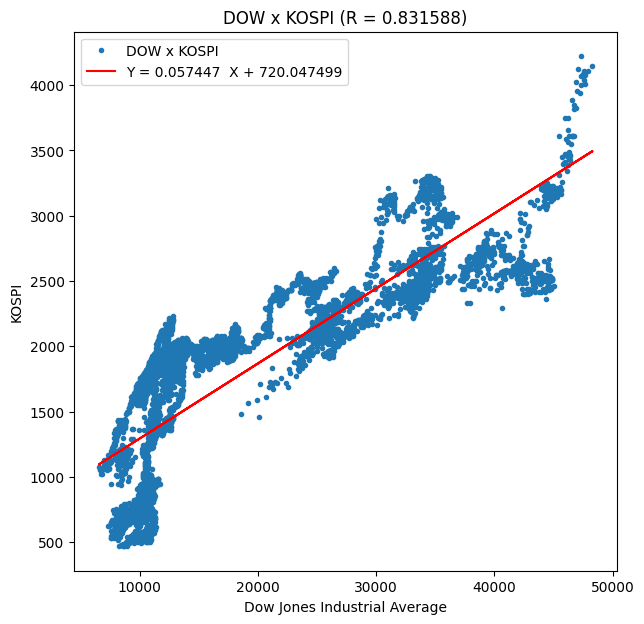

In [26]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats

ticker_dji = '^DJI'
ticker_kospi = '^KS11'
start_date = '2017-01-04'
end_date='2018-01-04'

dow_data = yf.download(ticker_dji, start=start_date, auto_adjust=True, progress=False)
kospi_data = yf.download(ticker_kospi, start=start_date, auto_adjust=True, progress=False)

#print(dow_data.columns)
#print(dow_data.index.names)
#print(dow_data.shape) #[0] row(). [1] columns
#print(type(dow_data))
print(dow_data.head())

df1 = dow_data[['Close']] #series ['Close'] or multiindex[['Close']]
print(df1.head())
df2 = dow_data['Close']
print(df2.head())
df3 = dow_data[['Close', 'High']]
print(df3.head())

#dow_data.columns = dow_data.columns.droplevel(0)
#kospi_data.columns = kospi_data.columns.droplevel(0)
#df = pd.DataFrame({'X': dow_data['Close'], 'Y': kospi_data['Close']})

df = pd.DataFrame({'X': dow_data['Close']['^DJI'],'Y': kospi_data['Close']['^KS11'] })
df = df.bfill().ffill()

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:2f}  X + {regr.intercept:2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [21]:
import matplotlib.pyplot as plt
import yfinance as yf

sec = yf.download('005930.KS', start='2018-05-04', auto_adjust=False) # false Adj Close shown, true Close to Adj
print(sec.columns)
print(sec.index.names)
print(sec.tail())

[*********************100%***********************]  1 of 1 completed

MultiIndex([('Adj Close', '005930.KS'),
            (    'Close', '005930.KS'),
            (     'High', '005930.KS'),
            (      'Low', '005930.KS'),
            (     'Open', '005930.KS'),
            (   'Volume', '005930.KS')],
           names=['Price', 'Ticker'])
['Date']
Price      Adj Close     Close      High       Low      Open    Volume
Ticker     005930.KS 005930.KS 005930.KS 005930.KS 005930.KS 005930.KS
Date                                                                  
2025-11-06   99200.0   99200.0  103800.0   98800.0  103700.0  28655689
2025-11-07   97900.0   97900.0  100300.0   96300.0   96400.0  22908083
2025-11-10  100600.0  100600.0  101000.0   97900.0   98600.0  23842327
2025-11-11  103500.0  103500.0  106000.0  102000.0  103700.0  27742542
2025-11-12  103100.0  103100.0  103900.0  101600.0  103000.0  20786492


In [16]:
sec = yf.download('005930.KS', start='2018-05-04', auto_adjust=True) # true Close mean Adj close
print(sec.tail())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker     005930.KS 005930.KS 005930.KS 005930.KS 005930.KS
Date                                                        
2025-11-06   99200.0  103800.0   98800.0  103700.0  28655689
2025-11-07   97900.0  100300.0   96300.0   96400.0  22908083
2025-11-10  100600.0  101000.0   97900.0   98600.0  23842327
2025-11-11  103500.0  106000.0  102000.0  103700.0  27742542
2025-11-12  103100.0  103900.0  101600.0  103000.0  19413497


In [39]:
import yfinance as yf
import pandas as pd 

ticker_sec = '005930.KS'
start_date = '2018-05-04'
df = yf.download(ticker_sec, start=start_date, auto_adjust=False)
df = df.sort_index(ascending=False)
#df = df.sort_index(ascending=True)
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open    Volume
Ticker     005930.KS 005930.KS 005930.KS 005930.KS 005930.KS 005930.KS
Date                                                                  
2025-11-12  103100.0  103100.0  103900.0  101600.0  103000.0  19413497
2025-11-11  103500.0  103500.0  106000.0  102000.0  103700.0  27742542
2025-11-10  100600.0  100600.0  101000.0   97900.0   98600.0  23842327
2025-11-07   97900.0   97900.0  100300.0   96300.0   96400.0  22908083
2025-11-06   99200.0   99200.0  103800.0   98800.0  103700.0  28655689


[*********************100%***********************]  1 of 1 completed


Price          Adj Close    Close     High      Low     Open    Volume
Date                                                                  
2017-07-10  39113.468750  48660.0  48900.0  48320.0  48500.0  10792750
2017-07-11  39386.761719  49000.0  49000.0  48280.0  48640.0   9717800
2017-07-12  40094.121094  49880.0  50000.0  48840.0  49000.0   9486150
2017-07-13  40640.707031  50560.0  50940.0  50040.0  50080.0  16034150
2017-07-14  40576.402344  50480.0  51080.0  50420.0  51000.0   8239000


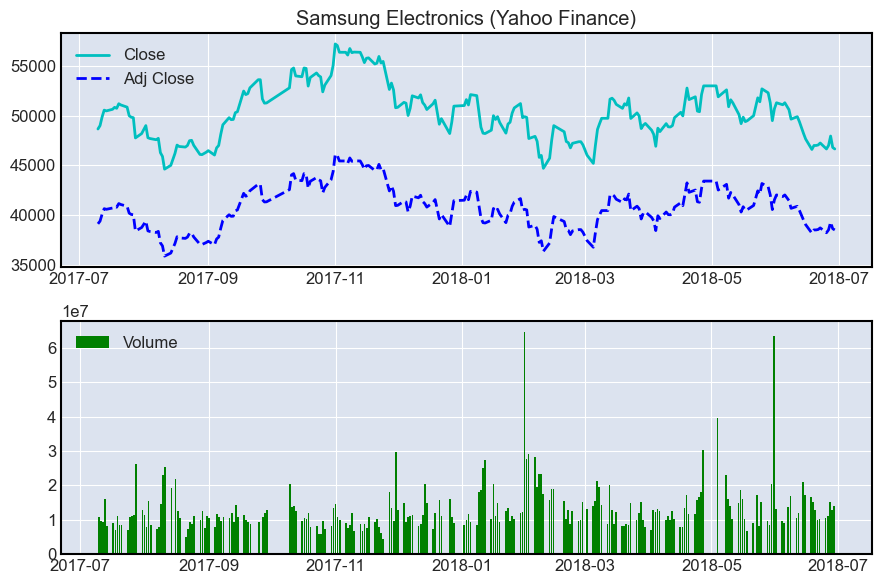

In [9]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt

ticker_sec = '005930.KS'
start_date = '2017-07-10'
end_date='2018-06-30'
df = yf.download(ticker_sec, start=start_date, end=end_date, auto_adjust=False)
#df = yf.download(ticker_sec, start=start_date, auto_adjust=False)

df.columns = df.columns.droplevel(1) # multi index로 인해 ticker를 제거하는 구문
print(df.head())

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1) 
plt.title('Samsung Electronics (Yahoo Finance)')
plt.plot(df.index, df['Close'], 'c', label='Close') 
plt.plot(df.index, df['Adj Close'], 'b--', label='Adj Close') 
plt.legend(loc='best')
plt.grid(True) 

plt.subplot(2, 1, 2) 
plt.bar(df.index, df['Volume'], color='g', label='Volume') 
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout() 
plt.show()

### 5.1.2 naver
시세 조회 API: Investar / Analyzer module, MarketBD class의 get_daily_price() method\
MariDB install, DBUpdater.py를 이용해 일별시세 데이터를 update 작업을 해야 함.
## 5.2 MariaDB 설치 후 접속확인
open source relation database management system(RBDMS)\
LAMP(리눅스 운영체제, 아파치 웹서버, MySQL db, PHP web page)의 MySQL과 완벽하게 호환 API
Michael Monty Widenius, MySQL AB를 Sun Microsystem 판매, Monty 퇴사, MariaDB 개발 GPL license 배포함.\
### 5.2.1 MariaDB 설치
www.mariadb.com - program 설치 - command line interface, CLI 기반
C:\Program files(x86) \ common files\mariaDBshared\HeidiSQL\heidisql.exe, graphic user interface, GUI 기반 실행
파이썬 프로그램 내부에서 MariaDB 사용을 위해 pymysql library 필요
pip install pymysql 설치




In [2]:
import matplotlib.pyplot as plt
from Investar import Analyzer

C:\Users\ppjm7\PycharmProjects\myPackage\05_stock_price_API\Investar\Analyzer.py:37: SyntaxWarning: invalid escape sequence '\D'
  start_lst = re.split('\D+', start_date)
C:\Users\ppjm7\PycharmProjects\myPackage\05_stock_price_API\Investar\Analyzer.py:58: SyntaxWarning: invalid escape sequence '\D'
  end_lst = re.split('\D+', end_date)
C:\Users\ppjm7\PycharmProjects\myPackage\05_stock_price_API\Investar\Analyzer.py:37: SyntaxWarning: invalid escape sequence '\D'
  start_lst = re.split('\D+', start_date)
C:\Users\ppjm7\PycharmProjects\myPackage\05_stock_price_API\Investar\Analyzer.py:58: SyntaxWarning: invalid escape sequence '\D'
  end_lst = re.split('\D+', end_date)


ModuleNotFoundError: No module named 'pymysql'

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import io
import mplfinance as mpf 
import matplotlib.pyplot as plt 

# User-Agent 설정
headers = {'User-agent': 'Mozilla/5.0'}
code = '05930' 
sise_url_base = f'https://finance.naver.com/item/sise_day.naver?code={code}'

# --- 1. 맨 뒤 페이지 숫자 구하기 ---
url_first = f'{sise_url_base}&page=1'
html = requests.get(url_first, headers=headers).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
last_page = int(str(pgrr.a['href']).split('=')[-1])
print(f"Total pages to crawl: {last_page}") # 출력 메시지도 영어로 변경

# --- 2. 전체 페이지 읽어오기 ---
all_pages_data = [] 
for page in range(1, last_page + 1):
    url = f'{sise_url_base}&page={page}'
    html = requests.get(url, headers=headers).text
    html_io = io.StringIO(html)
    page_df = pd.read_html(html_io, header=0)[0] 
    all_pages_data.append(page_df) 

# --- 3. 데이터 합치기 및 정제 ---
df = pd.concat(all_pages_data, ignore_index=True)
df = df.dropna()
df = df.iloc[0:30]

df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by="Date")
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
print(df)


AttributeError: 'NoneType' object has no attribute 'a'

Total pages to crawl: 737
             Date    Close        전일비     Open     High      Low    Volume
11038  1996.06.29  68500.0    상승  400  68100.0  69100.0  67100.0   96710.0
11041  1996.06.28  68100.0  상승  1,200  67300.0  68500.0  67200.0  138430.0
11042  1996.06.27  66900.0    하락  800  67500.0  67700.0  66700.0  155450.0
11043  1996.06.26  67700.0    상승  200  67600.0  67900.0  66000.0  136630.0
11044  1996.06.25  67500.0        보합0  66500.0  68300.0  65600.0  112960.0


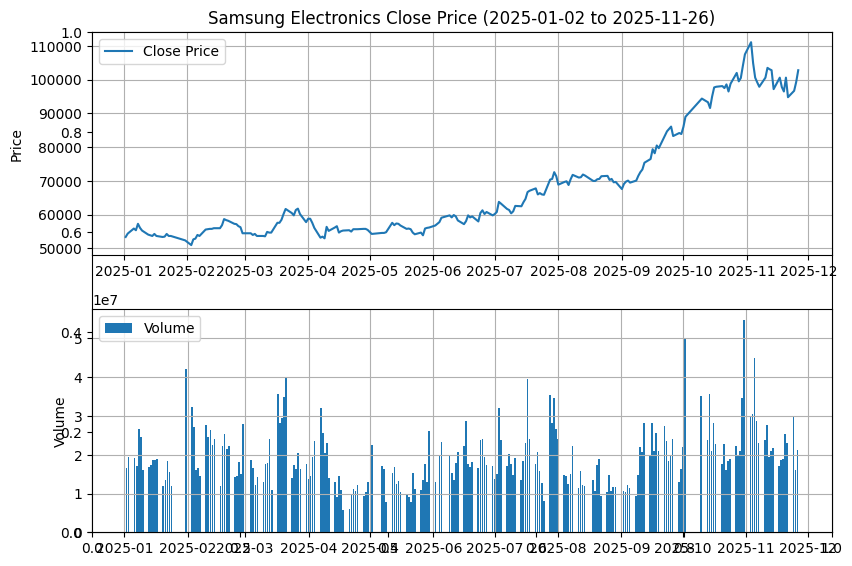

"\n# --- 시각화: 필터링된 기간 (2017-07-10 ~ 2018-06-30) ---\nplt.figure(figsize=(9, 4))\nplt.title(f'Samsung Electronics Close Price ({start_date_plot} to {end_date_plot})')\nplt.plot(df_plot_range.index, df_plot_range['Close'], 'r-', label='Close Price')\nplt.xlabel('Date')\nplt.ylabel('Price')\nplt.legend()\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n"

In [9]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import io
import mplfinance as mpf
import matplotlib.pyplot as plt
#sec 005930, celltrion 068270
# User-Agent 설정
headers = {'User-agent': 'Mozilla/5.0'}
code = '005930'
sise_url_base = f'https://finance.naver.com/item/sise_day.naver?code={code}'

# --- 1. 맨 뒤 페이지 숫자 구하기 ---
url_first = f'{sise_url_base}&page=1'
html = requests.get(url_first, headers=headers).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
last_page = int(str(pgrr.a['href']).split('=')[-1])
print(f"Total pages to crawl: {last_page}")

# --- 2. 전체 페이지 읽어오기 ---
all_pages_data = []
for page in range(1, last_page + 1):
    url = f'{sise_url_base}&page={page}'
    html = requests.get(url, headers=headers).text
    html_io = io.StringIO(html)
    page_df = pd.read_html(html_io, header=0)[0]
    all_pages_data.append(page_df)

# --- 3. 데이터 합치기 및 정제 ---
df = pd.concat(all_pages_data, ignore_index=True)
df = df.dropna()
#df = df.iloc[0:30]

# 4. 열 이름 변경 및 정렬
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})

print(df.tail())
# 5. 숫자 데이터 변환 및 날짜 설정
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float) 

#df.index = pd.to_datetime(df.Date)

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df = df.sort_index() # 날짜를 오름차순 정렬

# --- 6. 2017-07-10 ~ 2018-06-30 Close 데이터 추출 ---
start_date_plot = '2025-01-02'
end_date_plot = '2025-11-26'
df_plot_range = df.loc[start_date_plot:end_date_plot]

# --- 시각화: 필터링된 기간 (2017-07-10 ~ 2018-06-30) ---
plt.figure(figsize=(9, 6))
plt.title(f'Samsung Electronics Close Price ({start_date_plot} to {end_date_plot})')

plt.subplot(2, 1, 1)
plt.plot(df_plot_range.index, df_plot_range['Close'], label='Close Price')
#plt.plot(df.index, df['Close'], 'c', label='Close')
plt.legend(loc='best'), plt.grid(True), plt.ylabel('Price'), plt.tight_layout()

plt.subplot(2, 1, 2)
plt.bar(df_plot_range.index, df_plot_range['Volume'], label='Volume')
#plt.bar(df.index, df['Volume'], color='g', label='Volume')
plt.legend(loc='best'), plt.grid(True), plt.ylabel('Volume'), plt.tight_layout()

#plt.tight_layout(rect=[0, 0, 1, 0.96]) # 전체 제목을 위한 간격 조정
plt.show()
'''
# --- 시각화: 필터링된 기간 (2017-07-10 ~ 2018-06-30) ---
plt.figure(figsize=(9, 4))
plt.title(f'Samsung Electronics Close Price ({start_date_plot} to {end_date_plot})')
plt.plot(df_plot_range.index, df_plot_range['Close'], 'r-', label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
'''

## 5.3 주식시세를 매일 DB로 업데이트하기
### 5.3.1 DBUpdater class 구조
C:\myPackage\Investar\
primary key\
composite primary key\
primary key에는 자동으로 index가 설정되어 code와 date를 이용, 빠르게 조회.
